# Распознавание объектов

Распознавание объектов на картинках является одной из самых распространённых проблем машинного обучения. Сегодня мы познакомимся с очень популярной моделью — YOLO.

YOLO (You Only Look Once) — это семейство моделей, которые стали популярны благодаря легковесности и качеству предсказаний. Такие характеристики позволяют использовать YOLO для задач распознавания объектов в реальном времени и на портативных устройствах.

Что делает YOLO, когда учится на данных (простыми словами):

1: Обычно картинки приводят под размер 416x416 перед началом обучения нейронной сети.

2: Делим картинку (пока что мысленно) на клетки. В YOLOv3-4 принято делить на клетки размером 13x13 (о различных скейлах поговорим чуть позже, чтобы было понятнее).

![alternative_text](https://hsto.org/r/w1560/webt/ci/lq/ff/cilqffcvpw7rycahb_j5hwts4as.png)

Теперь фокусируемся на эти клеточках, на которые мы разделили картинку/кадр. Такие клетки, которые называются grid cells, лежат в основе идеи YOLO. Каждая клетка является «якорем», к которому прикрепляются bounding boxes. То есть, вокруг клетки рисуются несколько прямоугольников для определения объекта (поскольку непонятно, какой формы прямоугольник будет наиболее подходящим, их рисуют сразу несколько и разных форм) и его позиции, ширина и высота вычисляются относительно центра этой клетки.

![alternative_text](https://hsto.org/r/w1560/webt/0f/_-/1w/0f_-1wtt4qkwxr6bww4hpysnuwc.jpeg)

3: Картинка из датасета прогоняется через нашу нейронную сеть. (Заметим, что кроме картинки в тренировочном датасете у нас должны быть определены позиции и размеры настоящих bounding boxes для объектов, которые есть на ней. Это называется «аннотация» и делается это в основном вручную.)

Внутри у YOLO достаточно сложная структура, которая на выходе нам выдает:
1. координаты полученных «объектов»;
2. уверенность (от 0 до 1) в том, что это за объект.

![alternative_text](https://hsto.org/r/w1560/webt/bj/ld/wm/bjldwmnqycbox81gunaedgon4go.jpeg)

Сегодня мы посмотрим, как работают такие модели.

**Для начала загрузи модель детекции объектов из файла object_detection.zip на платформу Kaggle, чтобы она была доступна на платформе**

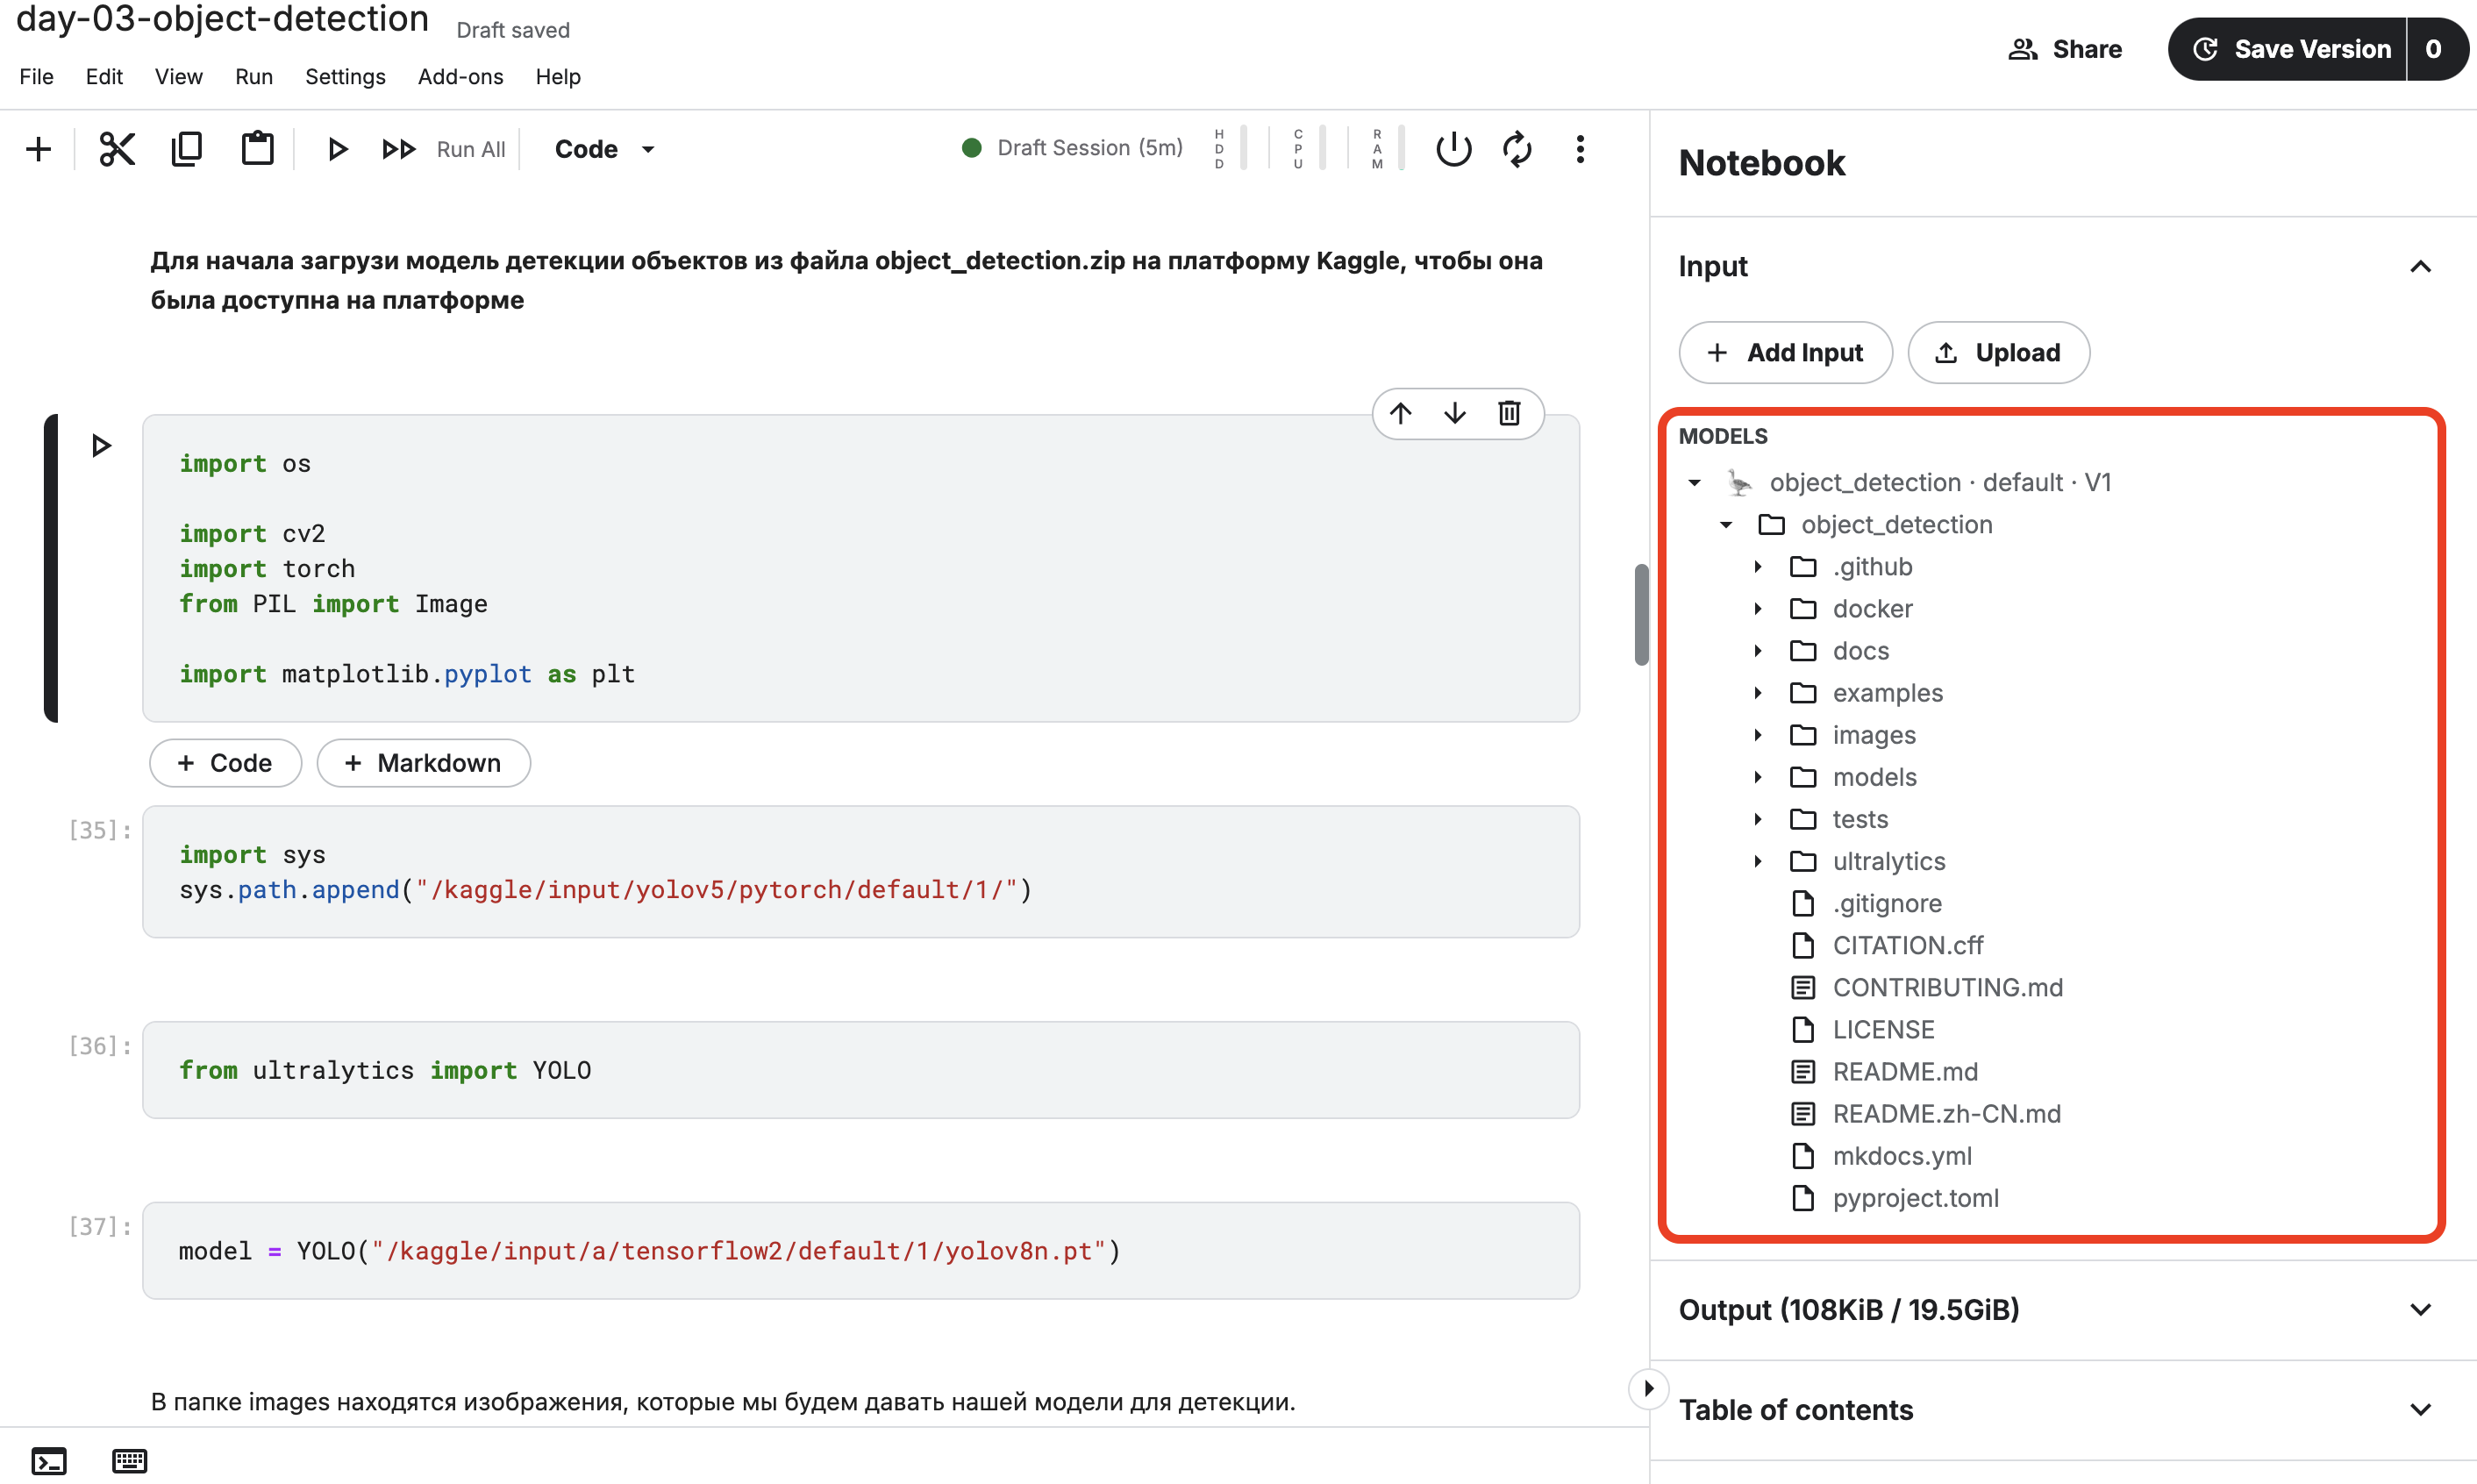

**После загрузки модели важно добавить папку object_detection в переменные окружения с помощью следующего блока кода**

In [1]:
import sys
sys.path.append("/kaggle/input/tts/pytorch/default/1/object_detection/object_detection") 

Теперь мы можем работать с моделью Yolo. Загрузим оставшиеся библиотеки

In [2]:
import os

import cv2
import torch
from PIL import Image

from ultralytics import YOLO
import matplotlib.pyplot as plt 

In [3]:
model = YOLO("/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/models/yolov8s.pt")
print("Модель добавлена")

Модель добавлена


В папке `object_detection/images/good` находятся изображения, которые мы будем давать нашей модели для детекции.

In [4]:
def get_path_names(folder):
    # list files in img directory
    files = os.listdir(folder)
    images = []
    for file in files:
        # make sure file is an image
        if file.endswith(('.jpg', '.png', 'jpeg')) and not file.startswith('._'):
            img_path = os.path.join(folder, file)
            images.append(img_path)
    
    return images

In [5]:
images = get_path_names('/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/good')
images

['/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/good/bus.jpg',
 '/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/good/zidane.jpg',
 '/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/good/people.jpeg']

Посмотрим, как отработает наша модель на этих картинках.

In [6]:
images_loaded = []
for image_filepath in images:
    image = cv2.imread(image_filepath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    images_loaded.append(image)

In [7]:
results = model(images_loaded)


0: 640x640 4 persons, 1 bus, 341.0ms
1: 640x640 2 persons, 2 ties, 341.0ms
2: 640x640 5 persons, 341.0ms
Speed: 6.5ms preprocess, 341.0ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)


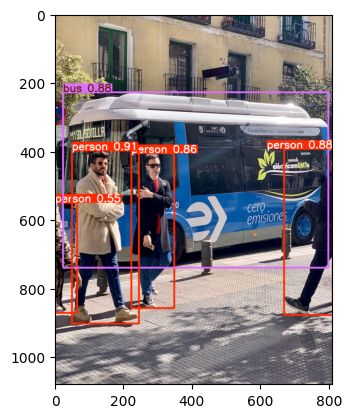

In [8]:
plt.imshow(results[0].plot());

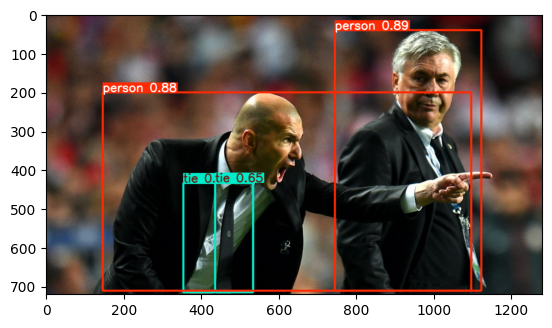

In [9]:
plt.imshow(results[1].plot());

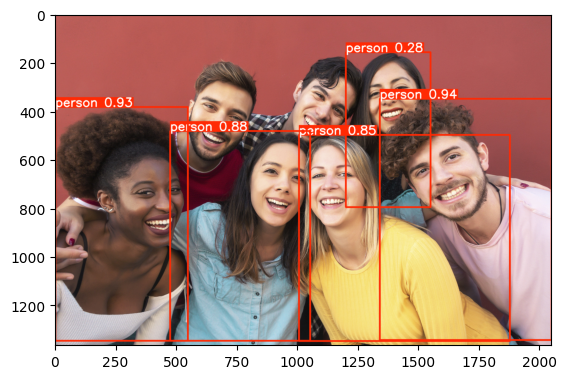

In [10]:
plt.imshow(results[2].plot());

Если же мы выведем результаты нашей модели, мы увидим, что в ней находятся координаты рамок, в которых модель нашла объект, вычисленная вероятность, соответствующая этому объекту и класс(тип объекта).

Как у любой модели, у YOLO есть свои ограничения.
Взгляни на следующий пример:

In [11]:
images = get_path_names('/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/bad')
images

['/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/bad/up.jpeg',
 '/kaggle/input/tts/pytorch/default/1/object_detection/object_detection/images/bad/lots_of_people.jpeg']

In [12]:
images_loaded = []
for image_filepath in images:
    image = cv2.imread(image_filepath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    images_loaded.append(image)

In [13]:
results = model(images_loaded)


0: 640x640 1 person, 1 bird, 298.3ms
1: 640x640 9 persons, 298.3ms
Speed: 1.9ms preprocess, 298.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


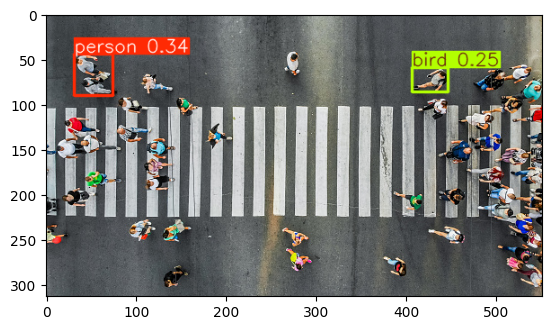

In [14]:
plt.imshow(results[0].plot());

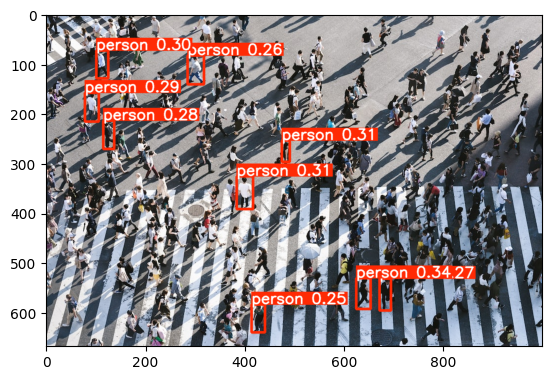

In [15]:
plt.imshow(results[1].plot());

Как видишь, на этих картинках результаты достаточно скудные. Как думаешь, почему?

- Плохое качество изображений: Если изображения размиты, низкокачественные или имеют сильные артефакты, модель может не уметь корректно распознавать объекты.
- Фоны и помехи: Если на изображениях много отвлекающих факторов или объектов, модель может неправильно распознавать людей.


0: 640x640 4 persons, 2 birds, 2 skateboards, 296.0ms
1: 640x640 10 persons, 296.0ms
Speed: 1.8ms preprocess, 296.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


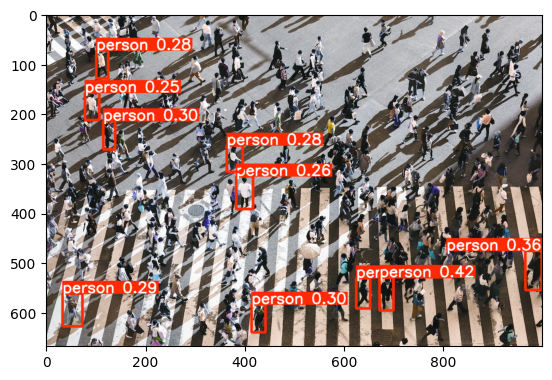

In [16]:
images_loaded = []
for image_filepath in images:
    image = cv2.imread(image_filepath)    
    images_loaded.append(image)
results = model(images_loaded)    
plt.imshow(results[1].plot());

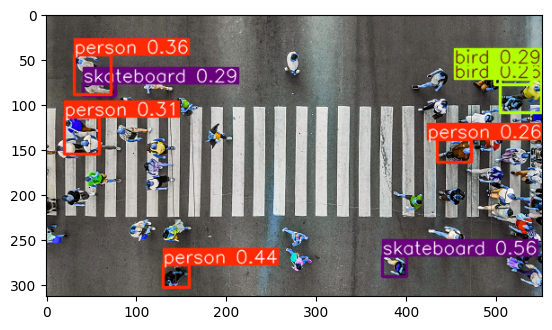

In [17]:
plt.imshow(results[0].plot());

# Задание 2

1. Загрузи как датасет изображения, на которых ты бы хотел протестировать работу алгоритма. Алгоритм обучен на датасете [COCO](https://cocodataset.org/#explore).
2. Протестируй модель на выбранных изображениях. Проанализируй результаты модели.
3. Если на каких-то изображениях модель продемонстрировала неточные предсказания, то опиши возможную причину.

In [18]:
my_images = get_path_names('/kaggle/input/project-03-my-dataset/my_dataset')
my_images

['/kaggle/input/project-03-my-dataset/my_dataset/interesnye-fakty-ob-unikalnosti-nekotoryx-zhivotnyx-1.jpg',
 '/kaggle/input/project-03-my-dataset/my_dataset/af57b17f8578bf056a5cc406cee9474e_cropped_666x539.jpg',
 '/kaggle/input/project-03-my-dataset/my_dataset/volga.jpg',
 '/kaggle/input/project-03-my-dataset/my_dataset/75b4067e7f50416ca1152aa65cac54c4.jpg',
 '/kaggle/input/project-03-my-dataset/my_dataset/Без названия (1).png',
 '/kaggle/input/project-03-my-dataset/my_dataset/Без названия.png']

In [19]:
images_loaded = []
for image_filepath in my_images:
    image = cv2.imread(image_filepath)   
    images_loaded.append(image)


0: 640x640 1 person, 6 birds, 2 elephants, 2 zebras, 1 giraffe, 332.4ms
1: 640x640 2 birds, 332.4ms
2: 640x640 2 persons, 1 dog, 1 backpack, 332.4ms
3: 640x640 1 person, 1 cat, 1 bed, 332.4ms
4: 640x640 1 umbrella, 332.4ms
5: 640x640 (no detections), 332.4ms
Speed: 1.5ms preprocess, 332.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


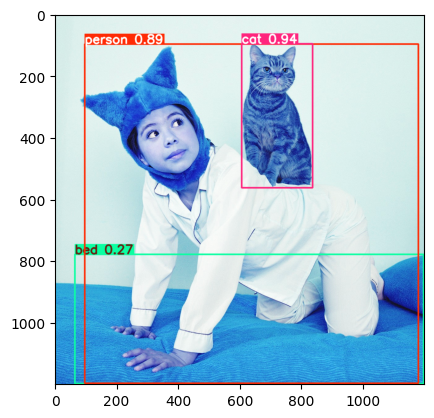

In [20]:
results = model(images_loaded)    
plt.imshow(results[3].plot());

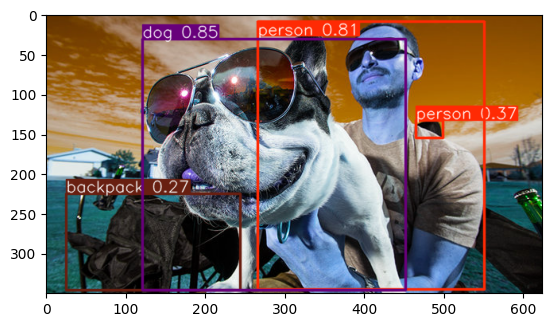

In [21]:
plt.imshow(results[2].plot());

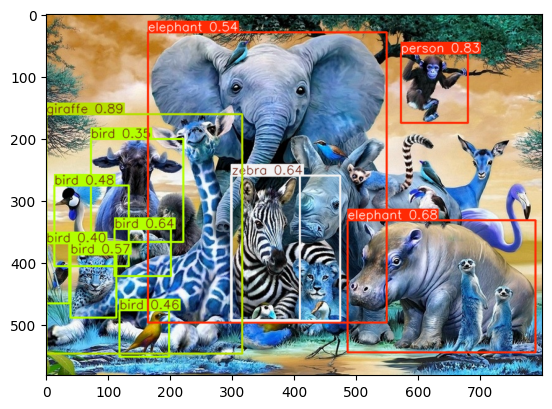

In [22]:
plt.imshow(results[0].plot());

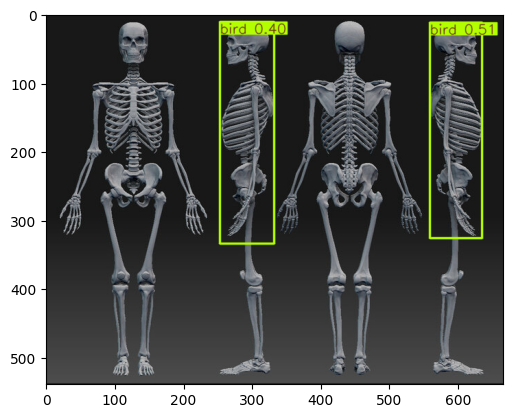

In [23]:
plt.imshow(results[1].plot());

- Обработка изображений: Правильный размер, нормализация и цветовая схема (RGB vs. BGR) могут значительно повлиять на производительность.
- Изменение цвета: В случае нестандартного варианта цвета модель выдает неверные данные
- Сложные условия освещения: Низкая освещенность, яркое освещение или освещение, создающее тени, могут затруднить модель в распознавании объектов.
